In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def is_integer(val):
	if val%2 == 0:
		return True
	else:
		return False

def get_mid_value(val_list, quartile_pos):
	index_mid_point_of_list = (len(val_list)+1)/quartile_pos
	if is_integer(index_mid_point_of_list):
		if quartile_pos > 0:
			return val_list[int(index_mid_point_of_list)-1]
		else: 
			return val_list[int(index_mid_point_of_list)]
	else:
		mid_index_2 = round(index_mid_point_of_list)
		mid_index_1 = mid_index_2 - 1
		return (val_list[mid_index_1] + val_list[mid_index_2]) / 2

def get_five_numbers(val_list):
	sorted_val_list = sorted(val_list)
	midian = get_mid_value(sorted_val_list, 2)
	first_quartile = get_mid_value(sorted_val_list, 4)
	third_quartile =  get_mid_value(sorted_val_list, -4)
	return [min(sorted_val_list), first_quartile, midian, third_quartile, max(sorted_val_list)]

def get_iqr(first_quartile, third_quartile):
	return third_quartile - first_quartile

def get_outlier_index(val_list, lower_bound, upper_bound):
	return [i for i, val in enumerate(val_list) if val < lower_bound or val > upper_bound]

def replace_outlier(val_list, outlier_index_list):
	val_list = [val for val in val_list]
	outlier_index_list = sorted(outlier_index_list, reverse=True)
	for index in outlier_index_list:
		val_list[index] = val_list[index - 1]
	return val_list

def remove_outlier(val_list, outlier_index_list):
	val_list = [val for val in val_list]
	outlier_index_list = sorted(outlier_index_list, reverse=True)
	for index in outlier_index_list:
		del val_list[index]
	return val_list

def fixing(original_list):
    five_numbers = get_five_numbers(original_list)
    iqr = get_iqr(five_numbers[1], five_numbers[3])
    lower_bound = five_numbers[1] - 1.5*(iqr)
    upper_bound = five_numbers[3] + 1.5*(iqr)
    outlier_index_list = get_outlier_index(original_list, lower_bound, upper_bound)
    outlier_fixed_list = replace_outlier(original_list, outlier_index_list)
    return outlier_fixed_list, five_numbers, iqr, lower_bound, upper_bound, outlier_index_list

In [3]:
#read data
file = r'data/weather.xls'
df = pd.read_excel(file)
original_list = list(df['Wind Speed'])


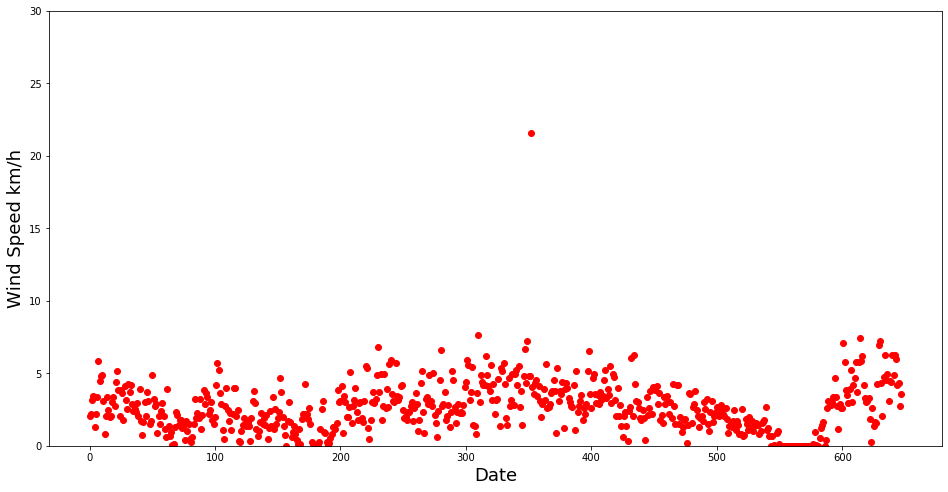

In [4]:
#convert to dataframe
df = pd.DataFrame(data=original_list, columns=['Wind Speed'], dtype=None, copy=False)
#vitualization
plt.figure(figsize=(16, 8))
plt.plot(df['Wind Speed'], 'ro')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Wind Speed km/h', fontsize=18)
plt.ylim(0, 30)
plt.show()

In [5]:
#start fixing
fixed_windspeed = fixing(original_list)[0]


Five numbers: [MIN, Q1, Midian, Q3, MAX] -> 2.17
Lower bound: 3.44 
Upper bound: 1.29
IQR: 3.14
Outlier index list: 2.17


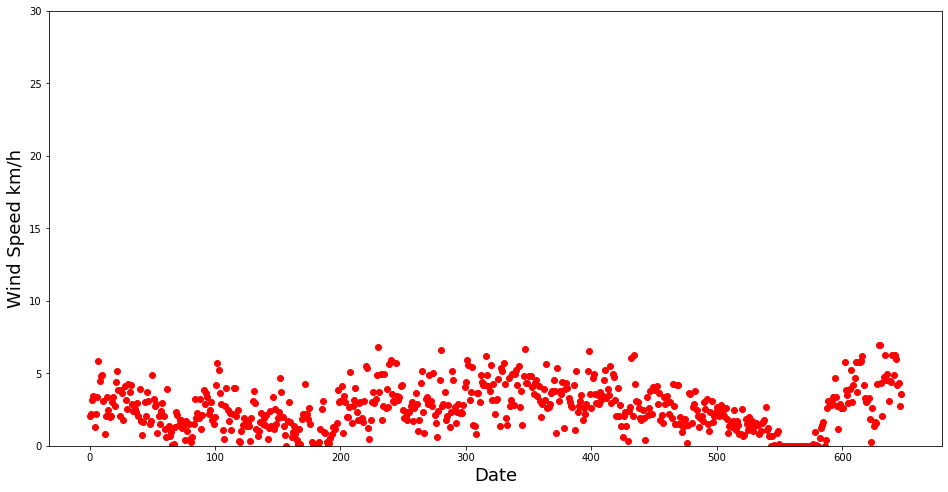

In [6]:
#print out the important variable
print('\nFive numbers: [MIN, Q1, Midian, Q3, MAX] ->', fixed_windspeed[1])
print('Lower bound:', fixed_windspeed[3], '\nUpper bound:', fixed_windspeed[4])
print('IQR:', fixed_windspeed[2])
print('Outlier index list:', fixed_windspeed[5])
#convert to dataframe
df = pd.DataFrame(data=fixed_windspeed, columns=['Wind Speed'], dtype=None, copy=False)
#vitualization
plt.figure(figsize=(16, 8))
plt.plot(df['Wind Speed'], 'ro')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Wind Speed km/h', fontsize=18)
plt.ylim(0, 30)
plt.show()